In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('/content/Telco_customer_churn_services.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              3166 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [ ]:
df.head().T

,0,1,2,3,4
Customer ID,8779-QRDMV,7495-OOKFY,1658-BYGOY,4598-XLKNJ,4846-WHAFZ
Count,1,1,1,1,1
Quarter,Q3,Q3,Q3,Q3,Q3
Referred a Friend,No,Yes,No,Yes,Yes
Number of Referrals,0,1,0,1,1
Tenure in Months,1,8,18,25,37
Offer,NaN,Offer E,Offer D,Offer C,Offer C
Phone Service,No,Yes,Yes,Yes,Yes
Avg Monthly Long Distance Charges,0.0,48.85,11.33,19.76,6.33
Multiple Lines,No,Yes,Yes,No,Yes


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.00,1.000,1.00,1.000,1.00
Number of Referrals,7043.0,1.951867,3.001199,0.00,0.000,0.00,3.000,11.00
Tenure in Months,7043.0,32.386767,24.542061,1.00,9.000,29.00,55.000,72.00
Avg Monthly Long Distance Charges,7043.0,22.958954,15.448113,0.00,9.210,22.89,36.395,49.99
Avg Monthly GB Download,7043.0,20.515405,20.418940,0.00,3.000,17.00,27.000,85.00
Monthly Charge,7043.0,63.596131,31.204743,-10.00,30.400,70.05,89.750,118.75
Total Charges,7043.0,2280.381264,2266.220462,18.80,400.150,1394.55,3786.600,8684.80
Total Refunds,7043.0,1.962182,7.902614,0.00,0.000,0.00,0.000,49.79
Total Extra Data Charges,7043.0,6.860713,25.104978,0.00,0.000,0.00,0.000,150.00
Total Long Distance Charges,7043.0,749.099262,846.660055,0.00,70.545,401.44,1191.100,3564.72


In [ ]:
df.isnull().sum()

Customer ID                             0
Count                                   0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

In [ ]:
from sklearn.impute import SimpleImputer
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])


In [ ]:
df.isnull().sum()

Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.00,1.000,1.00,1.000,1.00
Number of Referrals,7043.0,1.951867,3.001199,0.00,0.000,0.00,3.000,11.00
Tenure in Months,7043.0,32.386767,24.542061,1.00,9.000,29.00,55.000,72.00
Avg Monthly Long Distance Charges,7043.0,22.958954,15.448113,0.00,9.210,22.89,36.395,49.99
Avg Monthly GB Download,7043.0,20.515405,20.418940,0.00,3.000,17.00,27.000,85.00
Monthly Charge,7043.0,63.596131,31.204743,-10.00,30.400,70.05,89.750,118.75
Total Charges,7043.0,2280.381264,2266.220462,18.80,400.150,1394.55,3786.600,8684.80
Total Refunds,7043.0,1.962182,7.902614,0.00,0.000,0.00,0.000,49.79
Total Extra Data Charges,7043.0,6.860713,25.104978,0.00,0.000,0.00,0.000,150.00
Total Long Distance Charges,7043.0,749.099262,846.660055,0.00,70.545,401.44,1191.100,3564.72


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

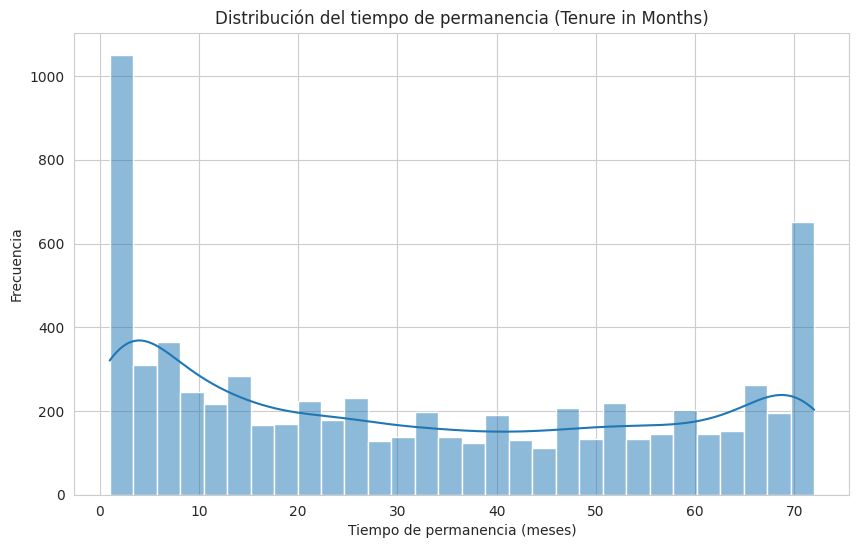

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure in Months'], bins=30, kde=True)
plt.title('Distribución del tiempo de permanencia (Tenure in Months)')
plt.xlabel('Tiempo de permanencia (meses)')
plt.ylabel('Frecuencia')
plt.show()


Distribución del tiempo de permanencia (Tenure in Months):

La mayoría de los clientes tienen un tiempo de permanencia que varía ampliamente, con algunos picos en ciertos intervalos de tiempo. Esto sugiere que hay grupos de clientes con diferentes duraciones de permanencia, quizás influenciados por contratos o promociones específicas.

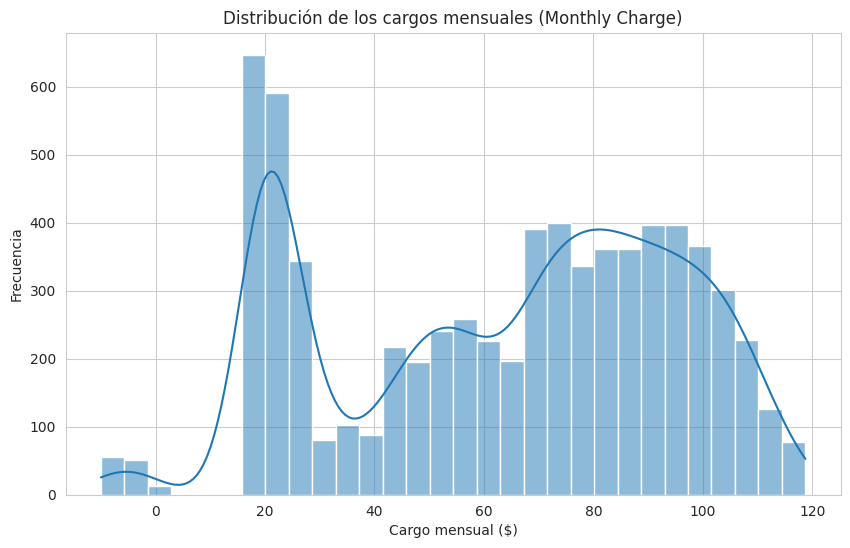

In [ ]:
# Graficar la distribución de los cargos mensuales (Monthly Charge)
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly Charge'], bins=30, kde=True)
plt.title('Distribución de los cargos mensuales (Monthly Charge)')
plt.xlabel('Cargo mensual ($)')
plt.ylabel('Frecuencia')
plt.show()

Distribución de los cargos mensuales (Monthly Charge):

Los cargos mensuales también muestran una amplia distribución, con una concentración alrededor de ciertos valores. Esto puede indicar diferentes planes tarifarios o paquetes de servicios.

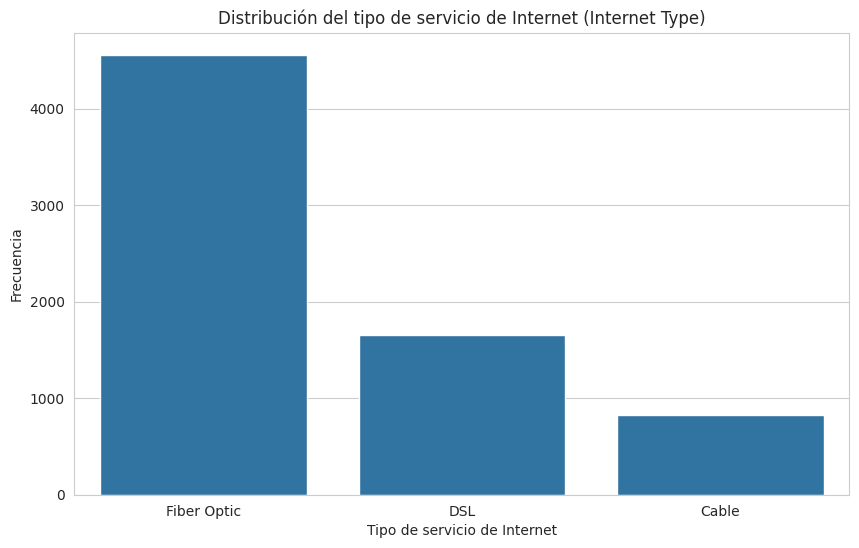

In [ ]:
# Graficar la distribución del tipo de servicio de Internet (Internet Type)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Internet Type', order=df['Internet Type'].value_counts().index)
plt.title('Distribución del tipo de servicio de Internet (Internet Type)')
plt.xlabel('Tipo de servicio de Internet')
plt.ylabel('Frecuencia')
plt.show()

Distribución del tipo de servicio de Internet (Internet Type):

La mayoría de los clientes parecen preferir ciertos tipos de servicios de Internet, con algunos tipos siendo mucho más populares que otros. Esto podría estar relacionado con la disponibilidad o la calidad percibida de los diferentes tipos de servicios.



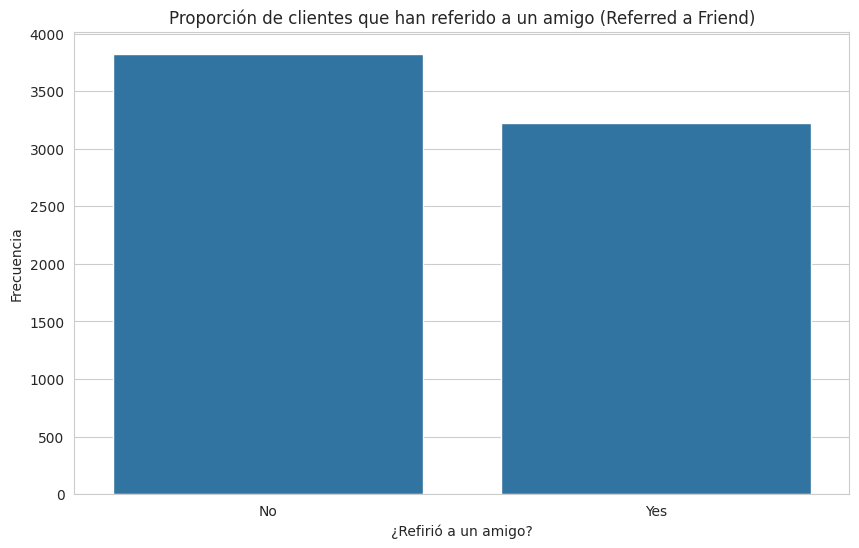

In [ ]:
# Graficar la proporción de clientes que han referido a un amigo (Referred a Friend)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Referred a Friend', order=df['Referred a Friend'].value_counts().index)
plt.title('Proporción de clientes que han referido a un amigo (Referred a Friend)')
plt.xlabel('¿Refirió a un amigo?')
plt.ylabel('Frecuencia')
plt.show()

Proporción de clientes que han referido a un amigo (Referred a Friend):

La mayoría de los clientes no han referido a un amigo, lo que podría sugerir una oportunidad para mejorar los programas de referencia o entender mejor las razones detrás de la falta de referencias.